In [1]:
##
##
##
## PowerSystem_Dataset
##
##o

In [2]:
##
##
##
## preprocessing du dataset
##
##
## 

In [3]:

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from scipy.stats import entropy
from statsmodels.tsa import stattools
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import *

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [4]:
data_1 = pd.read_csv("data1.csv")

In [5]:
##
##
##
## description du dataset 
##
##
## 

In [6]:
data_1.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,4966.000000,...,4966.0,4966.0,4966.000000,4966.000000,4966.000000,4966.000000,4966.0,4966.0,4966.0,4966.0
mean,-17.925492,130994.354960,8.610555,131258.159486,1.681621,131575.619600,-17.467920,397.526132,10.507730,390.915035,...,0.0,0.0,0.037857,0.022755,0.018526,0.029803,0.0,0.0,0.0,0.0
std,98.099812,6545.849798,115.044643,2692.553537,96.408966,2772.274253,97.437891,181.156073,111.699778,143.141274,...,0.0,0.0,0.190871,0.149136,0.134857,0.170060,0.0,0.0,0.0,0.0
min,-179.988962,24998.050190,-179.994691,102449.381200,-179.960314,98161.852050,-179.988962,0.000000,-179.736860,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,-97.404258,131007.835800,-99.085889,130706.956500,-77.405166,131064.250625,-97.626279,317.146520,-90.269501,325.844245,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,-35.864293,131634.667500,17.077007,131333.788300,14.080438,131684.814000,-33.369062,389.658080,6.720795,391.855400,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,71.277382,132136.132900,116.783123,131835.253700,77.995312,132211.352700,67.545994,464.321182,115.522615,469.127820,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,179.994691,146302.530500,179.971773,146327.603700,179.966044,146452.970100,179.925936,1771.039920,179.988962,1263.642110,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0


In [7]:
data_1.columns.values

array(['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH',
       'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I',
       'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH',
       'R1-PM8:V', 'R1-PA9:VH', 'R1-PM9:V', 'R1-PA10:IH', 'R1-PM10:I',
       'R1-PA11:IH', 'R1-PM11:I', 'R1-PA12:IH', 'R1-PM12:I', 'R1:F',
       'R1:DF', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V',
       'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH',
       'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I',
       'R2-PA7:VH', 'R2-PM7:V', 'R2-PA8:VH', 'R2-PM8:V', 'R2-PA9:VH',
       'R2-PM9:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA11:IH', 'R2-PM11:I',
       'R2-PA12:IH', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R2-PA:Z', 'R2-PA:ZH',
       'R2:S', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V',
       'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH',
       'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V',
       'R3-PA8:VH',

In [8]:
print(pd.Series(data_1['marker']).value_counts())

Attack      3866
Natural      927
NoEvents     173
Name: marker, dtype: int64


In [9]:
data_1 = data_1.replace({'Attack': 2, 'Natural': 0,'NoEvents':1})

In [10]:
data_1.isnull().values.any() #nan values?

False

In [11]:
data_1.isnull().any().any()

False

In [12]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]

In [13]:
rows_with_infini.iloc[150].values
#il y a des valeurs infinies

array([-1.24091199e+02,  5.85711587e+04,  1.31390682e+02,  1.22608290e+05,
       -6.80100903e+00,  1.26469574e+05,  1.78092472e+02,  1.68149913e+03,
       -1.43972835e+02,  5.34681200e+01,  8.35028691e+01,  5.82289800e+01,
       -1.19043441e+02,  1.01396304e+05,  6.77866367e+01,  3.30967164e+04,
        6.77178818e+01,  1.02549674e+04, -1.79994691e+02,  5.28272350e+02,
        1.77175739e+02,  5.80458700e+02,  1.77250224e+02,  5.72951190e+02,
        6.00560000e+01, -2.00000000e-01,  5.15957647e-01,  1.17204394e+00,
        2.05800000e+03, -1.49735423e+02,  1.26584250e+05,  9.03213492e+01,
        1.26429305e+05, -2.97207656e+01,  1.26661039e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.49713444e+02,  1.26556773e+05,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [14]:
rows_with_infini[rows_with_infini['marker']==1].count()

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [15]:
#on remplace les valeurs infinies par 2 fois la valeur max du dataset
for column in data_1:
    is_infini = np.isinf(data_1[column]).any()
    if is_infini == True:
        data_1[column] = data_1[column].replace({np.inf: data_1[column][data_1[column]!=np.inf].max() *2, -np.inf: data_1[column][data_1[column]!= -np.inf].max() *2})
        

In [16]:
is_infini = np.isinf(data_1)

row_has_infini = is_infini.any(axis=1)

rows_with_infini = data_1[row_has_infini]
rows_with_infini.count()

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [17]:
list_ndiscrt = list(data_1.columns.values)
list_ndiscrt.remove('marker')



In [18]:
############### preprocessing from sklearn.preprocessing import MinMaxScaler

In [19]:
from sklearn.preprocessing import QuantileTransformer

In [20]:
scaler = QuantileTransformer(output_distribution = 'normal')
data_1_x = data_1.drop(['marker'],axis=1)

In [21]:
data_1[list_ndiscrt] = scaler.fit_transform(data_1_x)

In [22]:
data_1

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,0.656831,-1.824350,-0.420541,-1.812572,-1.997998,-1.838013,0.645451,1.789187,-0.535230,1.950627,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1
1,0.715875,-1.397837,-0.368787,-1.242061,-1.727821,-1.404533,0.735283,0.967422,-0.455581,1.159515,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1
2,0.716846,-1.387908,-0.367901,-1.225943,-1.725134,-1.391202,0.734798,0.967422,-0.455097,1.159515,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1
3,0.724970,-1.239352,-0.361389,-0.955471,-1.694790,-1.236652,0.744694,0.957454,-0.448334,1.128303,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1
4,0.735022,-0.548158,-0.353972,-0.253606,-1.670348,-0.533636,0.742890,0.977487,-0.443308,1.105489,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,0.448504,-0.828465,-0.624147,-0.496390,1.666671,-0.810910,0.444568,0.625703,-0.724776,0.658043,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0
4962,0.448178,-0.726606,-0.624657,-0.426601,1.665089,-0.721714,0.443610,0.637923,-0.727000,0.662411,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0
4963,0.445490,-0.595437,-0.627219,-0.253606,1.654981,-0.567211,0.439549,0.675277,-0.734256,0.672424,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0
4964,0.444984,-0.548158,-0.627942,-0.253606,1.652681,-0.567211,0.439216,0.672129,-0.734823,0.673702,...,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,0


In [ ]:
#on prépare un dataset PCA

In [25]:
######################### pca

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components = 25)

In [28]:
Y = data_1.drop(list_ndiscrt,axis=1)

In [29]:
principalComponents = pca.fit_transform(data_1.drop(['marker'],axis=1))

In [30]:
data_1_pca = pd.DataFrame(data = principalComponents)

In [31]:
data_1_pca = pd.concat([data_1_pca,Y],axis=1)
data_1_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,marker
0,9.559327,-9.313478,1.591731,1.745609,6.465840,-3.629321,-2.972455,3.647123,0.046652,1.934841,...,-1.115070,0.633219,-0.921934,-1.558062,-0.145404,-1.230525,0.163482,0.351815,-0.699756,1
1,8.844622,-5.846445,1.200184,2.276973,6.051612,-2.661378,-2.314824,2.729268,0.663932,-1.975198,...,-0.738906,-1.221136,0.728153,-0.388934,-0.156388,-0.427534,-0.202445,0.063441,-0.491966,1
2,8.829084,-5.829268,1.201289,2.265643,6.047920,-2.655103,-2.293267,2.722169,0.677279,-1.965138,...,-0.735632,-1.206713,0.724736,-0.396242,-0.166160,-0.446345,-0.201720,0.062053,-0.516183,1
3,8.634163,-5.532547,1.052836,1.718057,5.961040,-2.607602,-2.012646,2.750137,0.616968,-1.696671,...,-0.723115,-1.156584,0.528960,-0.492993,-0.239246,-0.589862,-0.217930,0.024766,-0.681699,1
4,8.020605,-4.710549,0.624799,0.336812,5.662879,-2.603820,-1.621805,2.861417,0.443345,-0.879386,...,-0.731317,-0.909520,0.733183,-0.497743,-0.287890,-0.396322,-0.418726,-0.237789,-0.738662,1


In [32]:
########################## test classifiers sur données brutes

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

In [34]:
data_1_train = data_1.sample(frac=0.7)
data_1_test = data_1.drop(data_1_train.index)

data_1_train_x = data_1_train.drop(['marker'],axis=1)
data_1_train_y = data_1_train['marker']

data_1_test_x = data_1_test.drop(['marker'],axis=1)
data_1_test_y = data_1_test['marker']

In [35]:
## decision tree

In [36]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [37]:
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9228187919463087

In [38]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 238,    2,   51],
       [   0,   49,    2],
       [  52,    8, 1088]])

In [39]:
## random forest

In [40]:
model = ensemble.RandomForestClassifier()

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9604026845637584

In [41]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 247,    0,   44],
       [   0,   51,    0],
       [  15,    0, 1133]])

Text(0.5, 1.0, 'importance de la feature')

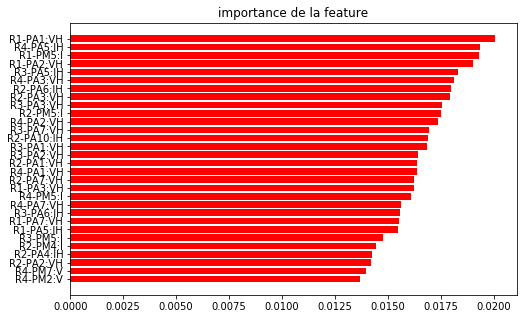

In [42]:
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),data_1.columns[indices])
plt.title("importance de la feature")

In [43]:
########## autres

In [44]:
model = KNeighborsClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8711409395973154

In [45]:
model = GradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8919463087248322

In [46]:
model = GaussianNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.2530201342281879

In [47]:
model = SVC()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7778523489932886

In [48]:


from sklearn import tree

model = tree.ExtraTreeClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9261744966442953

In [49]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9651006711409396

In [50]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.963758389261745

In [51]:


from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.22483221476510068

In [52]:


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.6006711409395973

In [53]:

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,100,30), max_iter=1000,
                     solver='sgd')

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,   y_dct)

0.8100671140939597

In [54]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.4046979865771812

In [55]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9664429530201343

In [56]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
model = BaggingClassifier(base_estimator=tree.ExtraTreeClassifier(), n_estimators=10, random_state=0)
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)


0.9570469798657718

In [57]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
model = BaggingClassifier(base_estimator=HistGradientBoostingClassifier(), n_estimators=10, random_state=0)
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)


0.9610738255033557

In [58]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('etc', tree.ExtraTreeClassifier()),
    ('hgbc', HistGradientBoostingClassifier())
    
]
model = VotingClassifier(classifiers)

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9275167785234899

In [59]:
#######  classifiers with pca

In [60]:
data_1_train = data_1_pca.sample(frac=0.7)
data_1_test = data_1_pca.drop(data_1_train.index)

data_1_train_x = data_1_train.drop(['marker'],axis=1)
data_1_train_y = data_1_train['marker']

data_1_test_x = data_1_test.drop(['marker'],axis=1)
data_1_test_y = data_1_test['marker']

In [61]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [62]:
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8503355704697987

In [63]:
confusion_matrix(data_1_test_y, y_dct)

array([[ 190,    0,  102],
       [   0,   41,   10],
       [ 100,   11, 1036]])

In [64]:
model = ensemble.RandomForestClassifier()

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
print(accuracy_score(data_1_test_y,y_dct))

print(confusion_matrix(data_1_test_y, y_dct))

0.8973154362416107
[[ 171    0  121]
 [   0   42    9]
 [  19    4 1124]]


In [65]:
model = KNeighborsClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8785234899328859

In [66]:
model = GradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8503355704697987

In [67]:
model = SVC()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7718120805369127

In [68]:


from sklearn import tree

model = tree.ExtraTreeClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.8442953020134228

In [69]:


from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9140939597315436

In [70]:
model = GaussianNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.5456375838926174

In [71]:


from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.7375838926174496

In [72]:


from sklearn.neighbors import NearestCentroid

model = NearestCentroid()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.2395973154362416

In [73]:

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(30,30,10), max_iter=1000,
                     solver='sgd')

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,   y_dct)

/usr/local/lib64/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8630872483221477

In [74]:
from sklearn.ensemble import AdaBoostClassifier


model = AdaBoostClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.5838926174496645

In [75]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()
model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9140939597315436

In [76]:
from sklearn.ensemble import VotingClassifier

classifiers = [
    ('etc', tree.ExtraTreeClassifier()),
    ('hgbc', HistGradientBoostingClassifier()),
    ('knc', KNeighborsClassifier()),
]
model = VotingClassifier(classifiers)

model.fit(data_1_train_x,data_1_train_y)
y_dct = model.predict(data_1_test_x)
accuracy_score(data_1_test_y,y_dct)

0.9013422818791946

In [ ]:
#les scores sont bons, 96% et plus